#**Partie QCM**

# 📊 **1–4 : Data Analysis**

1. Que renvoie la méthode .groupby() dans pandas ?

**C. Un objet regroupé par clé**

2. Quelle méthode calcule la médiane d’une colonne ?

**B. .median()**

3. Quel type de graphique est idéal pour analyser une distribution ?

**B. Boxplot**

4. Quel code remplace les NaN dans une colonne par 0 ?

**A. df.fillna(0)**


# 🤖 **5–8 : Machine Learning**

5. Quel algorithme est non-linéaire ?

**C. Decision Tree**

6. Pourquoi utilise-t-on un split train/test ?

**B. Pour évaluer la généralisation du modèle**

7. Quelle métrique est la plus adaptée si les classes sont déséquilibrées ?

**D. F1-score**

8. Que fait le paramètre max_depth dans un arbre ?

**B. Limite la profondeur de l’arbre**


# **🖼️ 9–12 : Computer Vision**

9. Quelle est la taille des images dans le dataset MNIST ?

**C. 28x28**

10. Quelle bibliothèque est utilisée pour charger des images en OpenCV ?

**B. cv2**

11. Que fait une convolution dans un CNN ?

**C. Elle extrait des motifs**

12. Quelle couche suit généralement une couche convolution ?

**D. MaxPooling**


# **🧠 13–16 : Deep Learning / NLP**

13. Que retourne une couche Embedding ?

**C. Un vecteur dense**

14. Quelle est la fonction d’activation la plus utilisée en NLP ?

**C. Softmax**

15. Que permet le padding dans les séquences NLP ?

**C. Uniformiser la longueur des phrases**

16. Quelle fonction compile un modèle Keras ?

**B. model.compile()**

# *📚 17–20 : LLM / Transformers*

17. Que veut dire “LLM” ?

**C. Large Language Model**

18. Quel est le rôle du tokenizer ?

**C. Convertir du texte en tokens**

19. Quel modèle est auto-régressif ?

**C. GPT**

20. Quelle bibliothèque gère les LLMs open source ?

**C. transformers**

# **✅ Projet 1 — Prédiction de la fraude bancaire avec XGBoost**

**Objectif** : Détecter les transactions frauduleuses sur carte bancaire

**Techniques** : XGBoost, SMOTE, GridSearch, AUC-ROC

📦 **Dataset** :
Credit Card Fraud Detection

🔧 **Tâches** :

* Analyse EDA (Exploratory Data Analysis)
* SMOTE pour équilibrer
* XGBoost tuning
* Explication des variables importantes
* Visualisation ROC + confusion matrix

In [ ]:
# importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
 # Accés au Drive à partir de Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Accés au dataset 'creditcard.csv'
df=pd.read_csv('/content/drive/MyDrive/Test Full Pack IA/creditcard.csv')

**Analyse EDA (Exploratory Data Analysis)**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


--> Le dataset **creditcard.csv** contient des données de transactions bancaires utilisées pour détecter des fraudes. Chaque colonne représente une caractéristique de la transaction, souvent transformée pour préserver la confidentialité.


📊 Colonnes du dataset creditcard.csv

**Time** : Temps écoulé en secondes depuis la première transaction enregistrée dans le dataset. Sert à analyser les transactions dans l’ordre chronologique.

**V1 à V28** : Variables anonymisées obtenues par transformation PCA (analyse en composantes principales). Elles représentent des caractéristiques dérivées des données originales (montant, type de commerçant, etc.) tout en protégeant la vie privée.

**Amount** : Montant de la transaction en euros. Cette colonne n’est pas anonymisée et peut être utilisée pour détecter des anomalies (ex. : montants inhabituels).

**Class** : Variable cible. Elle indique si la transaction est frauduleuse (1) ou non (0). C’est cette colonne que l’on cherche à prédire dans les modèles de détection de fraude.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


--> Nous pouvons constater que toutes les variables sont des **variables numériques** et qu’**il n’y a aucune valeur manquante** dans le dataset.

* **Recherche des valeurs aberrantes (boxplot)**




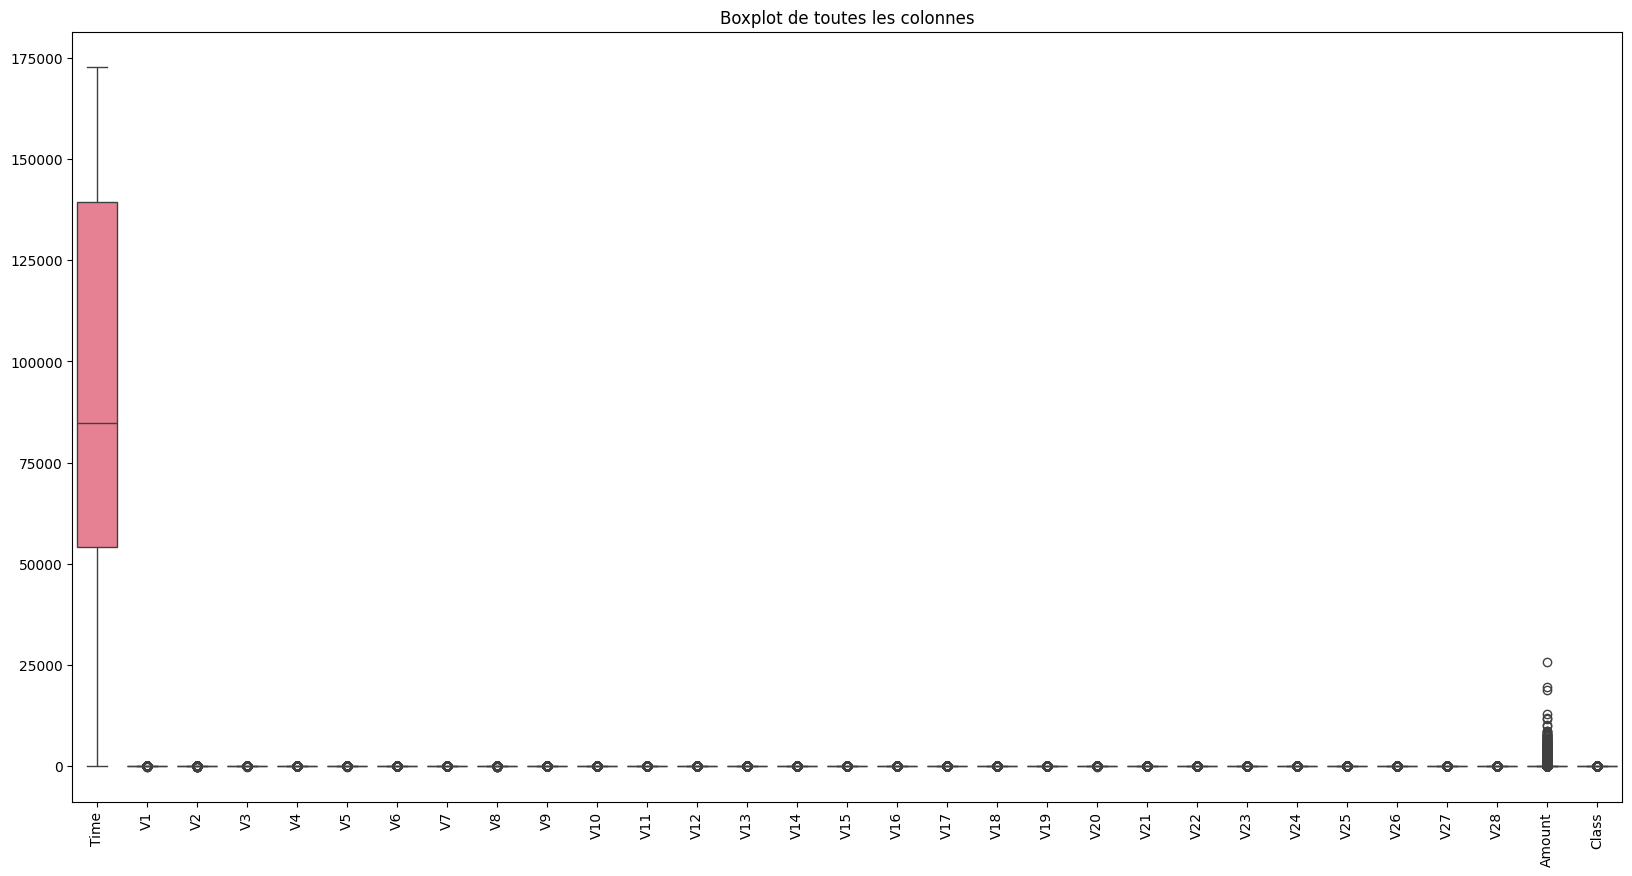

In [ ]:
plt.figure(figsize=(20, 10))  # Ajuste la taille selon le nombre de colonnes
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotation des noms de colonnes si nécessaire
plt.title("Boxplot de toutes les colonnes")
plt.show()


--> D'après le boxplot nous remarquons l'**existance des valeurs aberrantes dans la colonne Amount**.

**Détection des valeurs aberrantes dans la colonne Amount**

In [ ]:
# Détection des valeurs abérrabtes dans la colonne 'Amount'
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

Q1 =df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers= (df['Amount'] < Q1 - 1.5 * IQR) | (df['Amount'] > Q3 + 1.5 * IQR)

**Comptage du nombre de valeurs aberrantes dans la colonne Amount et calcul de sa proportion par rapport à l'ensemble des valeurs.**


In [ ]:
# Compter le nombre d'outliers dans la colonne Amount
nb_outliers = outliers.sum()

# proportion d'outliers
prop_outliers = nb_outliers / len(df)

print(f"Colonne {'Amount'} : {nb_outliers} outliers sur {len(df)} lignes - soit {prop_outliers:.2%} du total")

Colonne Amount : 31904 outliers sur 284807 lignes - soit 11.20% du total


**Correction des valeurs aberrantes**

Pour réduire l’impact des outliers tout en conservant la structure utile pour XGBoost nous allons appliqué l’**imputation par médiane**. Méthode simple à mettre en œuvre et améliore souvent la stabilité du modèle.

In [ ]:
median_value = df['Amount'].median()

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Amount'] = df['Amount'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)


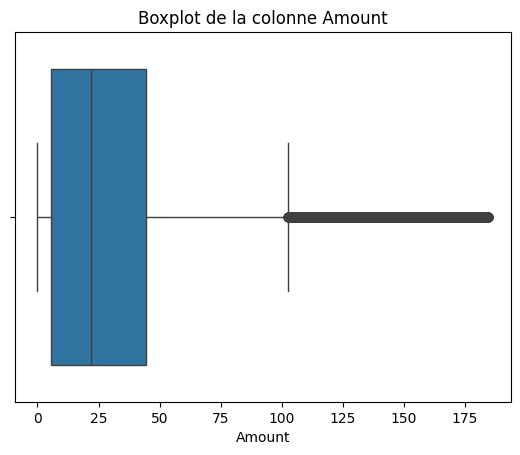

In [ ]:
sns.boxplot(x=df['Amount'])
plt.title('Boxplot de la colonne Amount')
plt.show()

Affichage d'un autre boxplot pour la même colonne 'Amount'

Text(0, 0.5, 'Amount')

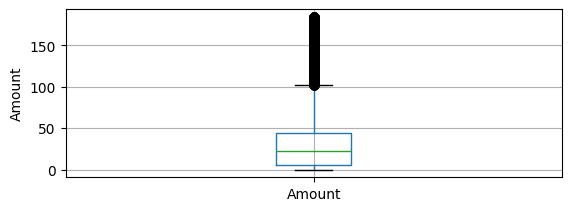

In [ ]:
plt.subplot(2, 1, 2)
fig = df.boxplot(column='Amount')
fig.set_title('')
fig.set_ylabel('Amount')

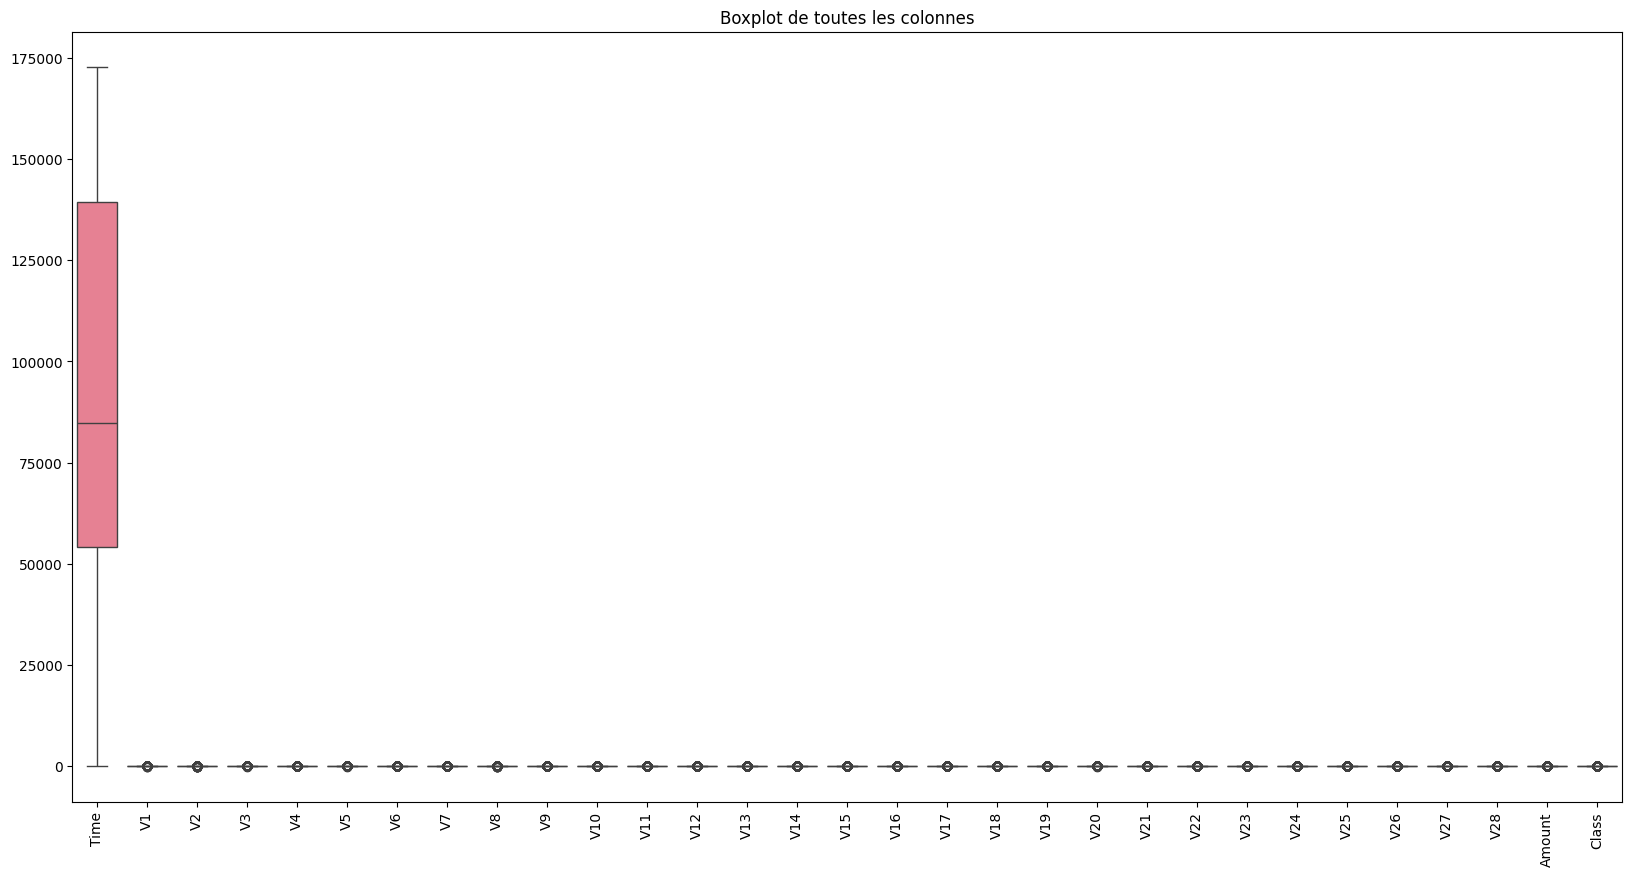

In [ ]:
plt.figure(figsize=(20, 10))  # Ajuste la taille selon le nombre de colonnes
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotation des noms de colonnes si nécessaire
plt.title("Boxplot de toutes les colonnes")
plt.show()

In [ ]:
# Compter les occurrences de chaque classe
df['Class'].value_counts()


,count
Class,
0,284315
1,492


--> Le **dataset** est fortement **déséquilibré** : très peu de transactions sont frauduleuses (=1)

In [ ]:
# calcul des proportions de chaque classe
df['Class'].value_counts()/float(len(df))

,count
Class,
0,0.998273
1,0.001727


--> Les **transactions frauduleuses** sont environ environ de *0.17 %*

# **Evaluation du modèle XGBoost sans SMOTE (avec des classes fortement déséquilibées)**

**Séparation des données**

In [ ]:
# Séparer les variables explicatives et la cible
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Création de la partie train et de la partie test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Entraîner le modèle
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:36:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Faire des prédictions**

In [ ]:
y_pred = model.predict(X_test)

**Evaluation du modèle**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:}")

Précision du modèle : 0.9995786664794073


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[85297    10]
 [   26   110]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9167    0.8088    0.8594       136

    accuracy                         0.9996     85443
   macro avg     0.9582    0.9044    0.9296     85443
weighted avg     0.9996    0.9996    0.9996     85443



**Création de matrice de confusion**

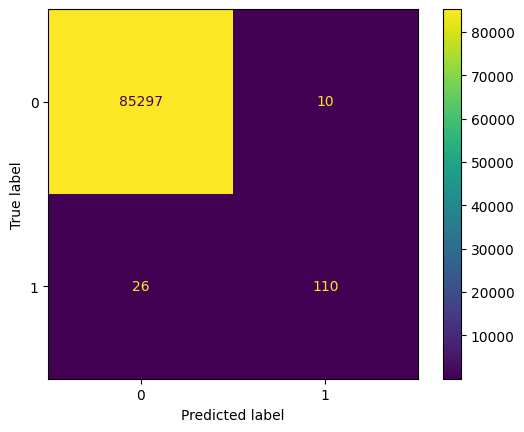

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **Test avec scale_pos_weight dans XGBoost sans modification des données originaux (donc sans SMOTE)**

**Pour tester avec scale_pos_weight dans XGBoost sans modifier les données, on va simplement ajuster un paramètre du modèle pour compenser le déséquilibre entre les classes.**

**Calculer le ratio entre les classes**

In [ ]:
from collections import Counter

# y est ton vecteur de classes
counter = Counter(y)
scale_pos_weight = counter[0] / counter[1]
print("scale_pos_weight =", scale_pos_weight)


scale_pos_weight = 577.8760162601626


**Séparation des données**

In [ ]:
# Séparer les variables explicatives et la cible
X1 = df.drop('Class', axis=1)
y1 = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, stratify=y, test_size=0.3, random_state=42)


**Entraîner XGBoost avec scale_pos_weight**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

model.fit(X1_train, y1_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:41:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Évaluation du modèle**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y1_pred = model.predict(X1_test)

print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred, digits=4))


[[85282    13]
 [   31   117]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.9000    0.7905    0.8417       148

    accuracy                         0.9995     85443
   macro avg     0.9498    0.8952    0.9207     85443
weighted avg     0.9995    0.9995    0.9995     85443



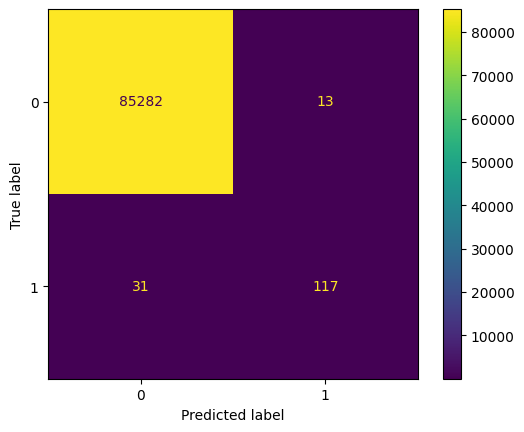

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y1_test, y1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **Evaluation du modèle avec SMOTE**

**SMOTE pour équilibrer les deux classes**

Sous-échantillonner légèrement la classe majoritaire

Réduis la classe 0 à un échantillon raisonnable (ex. 50 000) avant d’appliquer SMOTE : (pour éviter sur-apprentissage (overfitting))

In [ ]:
# Séparer les variables explicatives et la cible
X2 = df.drop('Class', axis=1)
y2 = df['Class']

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy={0: 50000}, random_state=42)
X_rus, y_rus = rus.fit_resample(X2, y2)


Appliquer SMOTE sur les données réduites

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_rus, y_rus)


In [ ]:
from collections import Counter

print("Répartition avant SMOTE :", Counter(y2))
print("Répartition après SMOTE :", Counter(y_balanced))

Répartition avant SMOTE : Counter({0: 284315, 1: 492})
Répartition après SMOTE : Counter({0: 50000, 1: 50000})


**Analyse de la répartition**

Avant SMOTE :

Classe 0 : 284 315

Classe 1 : 492 → Fort déséquilibre

Après SMOTE :

Classe 0 : 50 000

Classe 1 : 50 000 → Équilibrage parfait

--> SMOTE a généré 49 508 exemples synthétiques pour la classe 1 afin d’atteindre 50 000, en partant des 492 originaux.

**Séparer les données en entraînement et test**

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)


**Entraîner le modèle XGBoost**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X2_train, y2_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [16:45:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

**Faire des prédictions**

In [ ]:
y2_pred = model.predict(X2_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"Précision du modèle : {accuracy2:}")

Précision du modèle : 0.9993333333333333


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred, digits=4))


[[14983    17]
 [    3 14997]]
              precision    recall  f1-score   support

           0     0.9998    0.9989    0.9993     15000
           1     0.9989    0.9998    0.9993     15000

    accuracy                         0.9993     30000
   macro avg     0.9993    0.9993    0.9993     30000
weighted avg     0.9993    0.9993    0.9993     30000



**Explication des variables importantes**

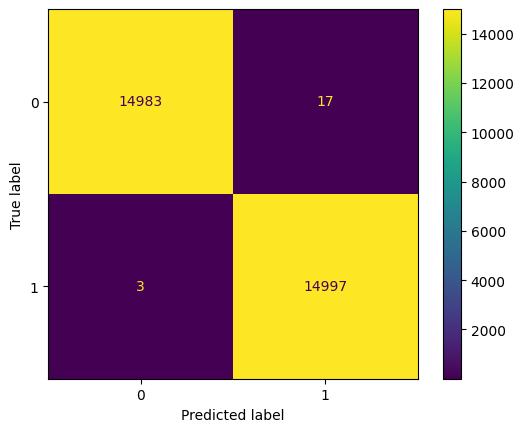

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y2_test, y2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


**Analyse des résulatats de la matrice de confusion**

17 fraudes non détectées (FN).

3 faux positif (FP) : excellent pour éviter les alertes inutiles.

# **Analyse sythétique des résultats des trois modèles**

* **Modèle XGBoost sans ajustement**

Le modèle est très performant sur la classe majoritaire (0), ce qui est attendu vu sa dominance dans les données.

Accuracy élevée mais trompeuse : elle reflète surtout la performance sur la classe 0.

* **Modèle XGBoost avec scale_pos_weight**

L’ajout de scale_pos_weight rééquilibre légèrement l’attention du modèle vers la classe minoritaire.

Cette méthode est simple et rapide, sans modifier les données, mais moins efficace que SMOTE pour capturer la complexité de la classe minoritaire.

Elle est utile quand on veut éviter la génération de données synthétiques, mais elle ne suffit pas toujours à corriger un déséquilibre extrême.

* **Modèle XGBoost avec SMOTE**

SMOTE a permis de créer un jeu de données parfaitement équilibré, ce qui facilite l’apprentissage du modèle sur les deux classes.

Les performances sont quasi parfaites, ce qui peut sembler idéal… mais attention :

Le jeu de test est équilibré et contient des données synthétiques → ce n’est pas représentatif du monde réel.

Le ***modèle peut sur-apprendre les motifs artificiels créés par SMOTE → risque d’overfitting***.

**--> Ces résultats doivent être validés sur un jeu de test réel, non modifié, pour confirmer leur robustesse.**

**Explication des variables importantes**

In [ ]:
model.feature_importances_


array([0.00727702, 0.01069172, 0.00654492, 0.01643493, 0.04189123,
       0.00569811, 0.00327601, 0.00555969, 0.01083265, 0.00782493,
       0.0113756 , 0.009816  , 0.04718653, 0.01171583, 0.6931798 ,
       0.00711724, 0.00620756, 0.02959971, 0.00633884, 0.00864508,
       0.00721587, 0.00606375, 0.00573455, 0.00615565, 0.0027424 ,
       0.00410721, 0.00393158, 0.00263404, 0.00308791, 0.01111361],
      dtype=float32)

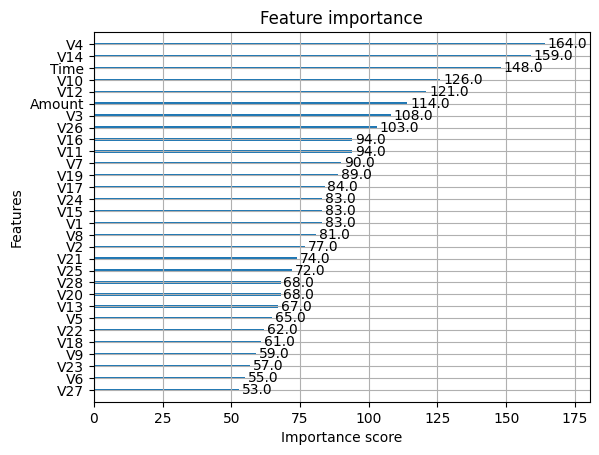

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.show()

--> D'après le graphe on peut remarquer que les variables **V4, V14 et Time** **contribuent massivement à la performance du modèle**.

**Visualisation ROC**

La **courbe ROC** montre la capacité du modèle à distinguer les classes.

*--> Plus la courbe est proche du coin supérieur gauche, plus c'est mieux.*

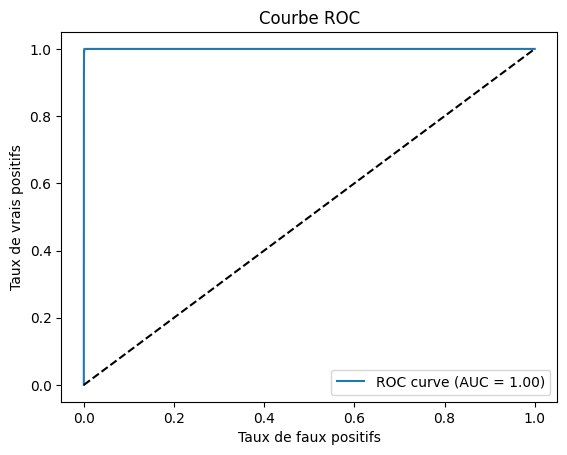

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()


# **✅ Projet 2 — Analyse de sentiments sur des avis de films**

**Objectif**: Classer automatiquement les critiques de films (positif/négatif)

**Techniques** : LSTM, GRU, Word Embedding, Attention

📦 **Dataset** :
IMDB Movie Review Dataset

🔧 **Tâches** :

* Tokenisation, padding
* Embedding layer
* Modèle LSTM ou GRU
* Visualisation des résultats
* Comparaison avec baseline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy

# **EDA (Exploratory Data Analysis )**

In [ ]:
#Accés au dataset 'creditcard.csv'
df=pd.read_csv('/content/drive/MyDrive/Test Full Pack IA/IMDB Dataset.csv')

In [ ]:
# Print the shape of dataframe
print(df.shape)

(50000, 2)


In [ ]:
# Print top 5 rows
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Check the distribution of Emotion
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


**--> Equilibre entre les deux classes**

In [ ]:
# Show sample exemple
print(f"{df['review'][0]} -> {df['sentiment'][0]}")

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

# **Preprocessing**

**Charger spaCy en mode rapide**

Charger spaCy en mode rapide signifie utiliser ses composants de manière optimisée pour gagner du temps et de la mémoire, surtout lors du chargement du modèle linguistique.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])  # désactive les modules lourds


**Nettoyage et encodage des labels**

In [ ]:
# Nettoyage de base des critiques de films
df['review'] = (
    df['review']
    .str.lower()  # Convertit tout le texte en minuscules pour uniformiser (ex. : "Good" devient "good")
    .str.replace('<br />', ' ')  # Supprime les balises HTML spécifiques (ici <br />) en les remplaçant par un espace
    .str.replace('[^a-zA-Z]', ' ', regex=True)  # Supprime tout caractère non alphabétique (chiffres, ponctuation, symboles) en le remplaçant par un espace
)


**fonction de nettoyage**

In [ ]:
def fast_preprocess(doc):
    return " ".join([
        token.lemma_ for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ])


**Remarque**:

**def preprocess(text)**:
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
    
    
**La fonction preprocess()**: utilise spaCy, qui est ***puissant mais lourd*** :

--> Elle analyse chaque review avec nlp(text) → cela déclenche un pipeline complet.

Puisque notre dataset IMDB contient 50 000 review, ça peut prendre plusieurs dizaines de minutes sans optimisation.

**--> Solution pour accélérer:** Utiliser nlp.pipe() au lieu de .apply().
nlp.pipe() est beaucoup plus rapide car il traite les textes en batch, sans relancer le pipeline à chaque ligne.

**Apply preprocess function on dataframe**

Appliquer à tout le dataset avec nlp.pipe()

In [ ]:
texts = df['review'].tolist()  # Convertit la colonne en liste
docs = nlp.pipe(texts, batch_size=1000, n_process=-1)  # Traitement en parallèle

df['clean_review'] = [fast_preprocess(doc) for doc in docs]


In [ ]:
print(df[['review', 'clean_review']].head())


                                              review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production    the filming t...   
2  i thought this was a wonderful way to spend ti...   
3  basically there s a family where a little boy ...   
4  petter mattei s  love in the time of money  is...   

                                        clean_review  
0  reviewer mention watch oz episode ll hook righ...  
1  wonderful little production filming technique ...  
2  think wonderful way spend time hot summer week...  
3  basically s family little boy jake think s zom...  
4  petter mattei s love time money visually stunn...  


**Encoding target column**

In [ ]:
df

,review,sentiment,clean_review
0,one of the other reviewers has mentioned that ...,positive,reviewer mention watch oz episode ll hook righ...
1,a wonderful little production the filming t...,positive,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,basically there s a family where a little boy ...,negative,basically s family little boy jake think s zom...
4,petter mattei s love in the time of money is...,positive,petter mattei s love time money visually stunn...
...,...,...,...
49995,i thought this movie did a down right good job...,positive,think movie right good job wasn t creative ori...
49996,bad plot bad dialogue bad acting idiotic di...,negative,bad plot bad dialogue bad act idiotic direct a...
49997,i am a catholic taught in parochial elementary...,negative,catholic teach parochial elementary school nun...
49998,i m going to have to disagree with the previou...,negative,m go disagree previous comment maltin second r...


In [ ]:
df['sentiment_num'] = df['sentiment'].map({'positive' : 1, 'negative': 0})

df.head(5)

,review,sentiment,clean_review,sentiment_num
0,one of the other reviewers has mentioned that ...,positive,reviewer mention watch oz episode ll hook righ...,1
1,a wonderful little production the filming t...,positive,wonderful little production filming technique ...,1
2,i thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,1
3,basically there s a family where a little boy ...,negative,basically s family little boy jake think s zom...,0
4,petter mattei s love in the time of money is...,positive,petter mattei s love time money visually stunn...,1


**Remarque**: LSTM attend des séquences d’entiers, pas des vecteurs TF-IDF.
Dans ce cas on doit utiliser Tokenizer + pad_sequences sur df['clean_review'].

**Explication:**

* **LSTM (Long Short-Term Memory)**: C’est un type de réseau de neurones récurrent (RNN) conçu pour traiter des séquences temporelles ou textuelles.

Il garde en mémoire l’ordre des mots, ce qui est essentiel pour comprendre le sens d’une phrase.

* **TF-IDF**
C’est une méthode statistique qui transforme un texte en vecteur de poids selon la fréquence des mots.

Elle ignore l’ordre des mots → donc incompatible avec LSTM qui a besoin de séquences ordonnées.

**Tokenisation + Padding**

**Tokenisation**

On transforme chaque mot en un entier unique :

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['clean_review'])

sequences = tokenizer.texts_to_sequences(df['clean_review'])

**Exemple tokenisation** :

Phrase : "je suis disponible" → Séquence : [12, 45, 78]

**Padding**

On uniformise la longueur des séquences pour qu’elles soient toutes identiques :

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 200
X_padded = pad_sequences(sequences, maxlen=maxlen, padding='post')


**Exemple :**

Phrase originale → "je suis dispo"	  

Séquence tokenisée → [12, 45, 78]

Séquence paddée → [12, 45, 78, 0, 0, ..., 0]


**Séparation des données**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_padded,
    df['sentiment_num'],
    test_size=0.2,
    random_state=42,
    stratify=df['sentiment_num']
)


--> Nous utilisons maintenant les séquences numériques (X_padded) et les bons labels (sentiment_num).

**Création du modèle LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=maxlen),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Compilation**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Entraînement**

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 386ms/step - accuracy: 0.5106 - loss: 0.6936 - val_accuracy: 0.5132 - val_loss: 0.6892
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 383ms/step - accuracy: 0.5271 - loss: 0.6834 - val_accuracy: 0.5349 - val_loss: 0.6719
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 125s 399ms/step - accuracy: 0.5421 - loss: 0.6569 - val_accuracy: 0.5234 - val_loss: 0.6714
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 390ms/step - accuracy: 0.5947 - loss: 0.6166 - val_accuracy: 0.8383 - val_loss: 0.4234
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 121s 387ms/step - accuracy: 0.8688 - loss: 0.3562 - val_accuracy: 0.8757 - val_loss: 0.3109


**Prédiction**

**Ligne 1 : y_pred = model.predict(X_test)**
Cette ligne génère les prédictions du modèle sur les données de test X_test.

-> Le résultat y_pred est un tableau de probabilités entre 0 et 1.


**Ligne 2 : y_pred_labels = (y_pred > 0.5).astype(int)**
Cette ligne convertit les probabilités en classes binaires (0 ou 1) :

* Si la probabilité est > 0.5, on considère que c’est la classe 1

* Sinon, c’est la classe 0

* astype(int) transforme les booléens (True, False) en entiers (1, 0)

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


**Matrice de confusion**

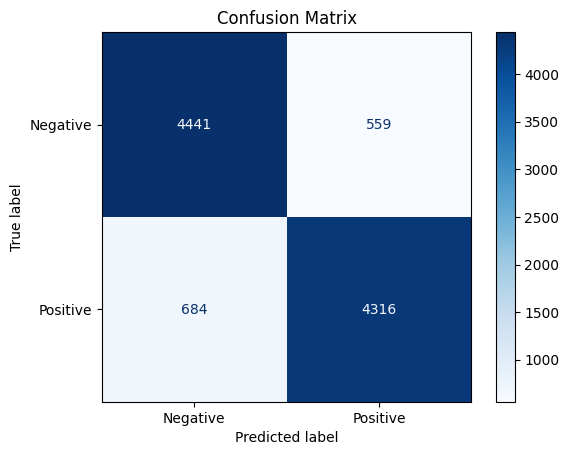

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


**Interprétation :**

4441 vrais négatifs : bien classés comme "Negative"

4316 vrais positifs : bien classés comme "Positive"

559 faux positifs : classés à tort comme "Positive"

684 faux négatifs : classés à tort comme "Negative"

**Rapport de classification**

In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels, target_names=['Negative', 'Positive']))




[[4441  559]
 [ 684 4316]]
              precision    recall  f1-score   support

    Negative       0.87      0.89      0.88      5000
    Positive       0.89      0.86      0.87      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




* **Matrice de confusion** →	Bon équilibre, mais quelques erreurs

* **Accuracy	88 %** → solide mais améliorable

* **F1-score**→	Très bon compromis entre précision et rappel

* **Modèle** →	**Bien entraîné, pas de sur-apprentissage évident**

**Comparaison avec une baseline**

Baseline : modèle simple (Logistic Regression + TF-IDF)

La comparaison avec une baseline est une étape essentielle pour évaluer si ton modèle LSTM apporte une réelle amélioration par rapport à une méthode plus simple.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Vectorisation TF-IDF
v = TfidfVectorizer(max_features=10000)
X_tfidf = v.fit_transform(df['clean_review'])

# Split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_tfidf, df['sentiment_num'], test_size=0.2, random_state=42, stratify=df['sentiment_num']
)

# Modèle baseline
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_base, y_train_base)

# Prédictions
y_pred_base = baseline_model.predict(X_test_base)

# Évaluation
print(confusion_matrix(y_test_base, y_pred_base))
print("Baseline Accuracy:", accuracy_score(y_test_base, y_pred_base))
print(classification_report(y_test_base, y_pred_base, target_names=['Negative', 'Positive']))


[[4389  611]
 [ 482 4518]]
Baseline Accuracy: 0.8907
              precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5000
    Positive       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Interprétaion**:

Le modèle baseline ( basé sur TF-IDF + régression logistique) est plus performant que le LSTM **(accuracy = 0.89)** sur notre jeu de données.

Il obtient une meilleure **accuracy (0.89)**, rappel et F1-score pour les deux classes (positive et negative).

--> Cela signifie que, dans ce cas, un modèle simple basé sur TF-IDF + régression logistique fait mieux qu’un modèle séquentiel plus complexe.

**Conclusion**:

Ton LSTM fonctionne bien, mais n’apporte pas d’amélioration significative par rapport à la baseline. Le modèle TF-IDF + Logistic Regression est plus rapide à entraîner, plus simple, et plus précis dans notre cas.

**Courbe ROC (Receiver Operating Characteristic)**

Permet de visualiser la capacité du modèle à distinguer les classes.

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


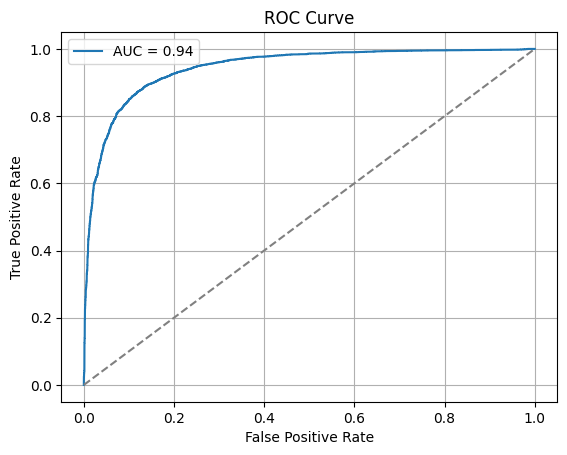

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


La courbe ROC permet d’évaluer la qualité d’un modèle de classification binaire (comme ton modèle LSTM qui prédit positif ou négatif). Elle montre comment le modèle se comporte à différents seuils de décision.

**Axes de la courbe**

* Axe X (FPR) : Taux de faux positifs → proportion de négatifs mal classés comme positifs

* Axe Y (TPR) : Taux de vrais positifs (aussi appelé Recall) → proportion de positifs bien classés

Le point (0,1) est parfait : aucun faux positif, tous les vrais positifs captés.

La diagonale (ligne grise) représente un modèle aléatoire (aucune capacité à distinguer les classes).

Plus la courbe est proche du coin supérieur gauche, meilleur est le modèle.

**AUC = Area Under the Curve (aire sous la courbe ROC)**

Elle mesure la capacité du modèle à distinguer les classes (ici : positif vs négatif)

Elle varie entre 0.5 (modèle aléatoire) et 1.0 (modèle parfait)

**Modèle avec AUC = 0.94 signifie que notre modèle LSTM a une très bonne capacité à distinguer les reviews positifs des négatifs.**

# **✅ Projet 4 — OCR intelligent pour lecture automatique de factures (Computer Vision)**

**IA appliquée à la vision par ordinateur et au traitement du langage naturel (NLP)**

**Objectif** :

Extraire texte structuré (nom, montant, date) à partir d’une image PDF ou JPEG

**Techniques** :

Tesseract OCR, OpenCV, post-processing NLP

📦 **Dataset** :

Invoice OCR Dataset

🔧 **Tâches** :

* Extraction texte avec Tesseract
* Nettoyage regex
* Classification des champs (entité nommée)
* Export JSON structuré

**Lecture de InvoiceOCR.zip à partir du drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Test Full Pack IA/InvoiceOCR.zip"
extract_path = "InvoiceOCR"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
# vérification de l'existance du dossier InvoiceOCR dans colab
import os
print(os.listdir())


['.config', 'drive', 'InvoiceOCR', 'sample_data']


**Décompresser le fichier InvoiceOCR.zip**

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Test Full Pack IA/InvoiceOCR.zip"  # Nom correct du fichier
extract_path = "InvoiceOCR"        # Dossier de destination

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

**Vérifier la structure du dossier**

In [ ]:
for root, dirs, files in os.walk("InvoiceOCR"):
    print(f"{root}: {len(files)} fichiers")


InvoiceOCR: 0 fichiers
InvoiceOCR/test: 0 fichiers
InvoiceOCR/test/images: 98 fichiers
InvoiceOCR/test/annotations: 98 fichiers
InvoiceOCR/train: 0 fichiers
InvoiceOCR/train/images: 778 fichiers
InvoiceOCR/train/annotations: 778 fichiers
InvoiceOCR/val: 0 fichiers
InvoiceOCR/val/images: 97 fichiers
InvoiceOCR/val/annotations: 97 fichiers


# Partie 1 : Traitement d’une seule image

Extraire le texte d’une image de facture, nettoyer les données, identifier les entités (nom, montant, date), et exporter en JSON structuré.

In [ ]:
!pip install pytesseract
!apt-get install -y tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


***Charger une image***

In [ ]:
import pytesseract
from PIL import Image
image_path = "InvoiceOCR/train/images/X00016469612.jpg"
image = Image.open(image_path)



***Appliquer Tesseract OCR***

Tesseract est un moteur de reconnaissance optique de caractères (OCR).

Il permet de convertir des images contenant du texte (photos, scans, PDF) en texte numérique exploitable.

In [ ]:
text = pytesseract.image_to_string(image)
print(text)


tan woon yann

BOOK TA -K (TAMAN DAYA) SDN BHD
TBO7-W
NO.5? $5,57 & 59, JALAN SAGU 18,
TAMAN DAYA
81100 JOHOR BAHRU.
JOHOR.

LAM MCAT

Document Ho : TDO1167104

 

 

Date 25/12/2018 8:13:39 PM
Cashier MANIS
Member
CASH BILL
CODE/DESC PRICE Dise AMOUNT
Quy RM RM
9556939040118 AF MODELLING CLAY KIDDY FiSHt
1PC + 9.00) 0,00 9.00
Total : 9,00
Rour ding Adjustment 0.00
Round. :d Total (RM): 9.00
Cash a 40.00.
CHANGE 00

  

GOODS SOLD ARE NOT RETURNAP
EXCHANGEABLE

 

THANK YOU
PLEASE COME AGAIN t



***Nettoyer le texte avec Regex***

Extraction de la date et du montant total du ticket

In [ ]:
import re

# Recherche des dates au format JJ/MM/AAAA ou JJ/MM/AA
date_patterns = [
    r'\d{2}/\d{2}/\d{4}',  # JJ/MM/AAAA
    r'\d{2}/\d{2}/\d{2}'   # JJ/MM/AA
]
dates = []
for pattern in date_patterns:
    dates += re.findall(pattern, text)

# Recherche du montant total (TOTAL ou SUBTOTAL avec différents séparateurs)
total_patterns = [
    r'TOTAL[\s:\-]*\d+[\.,]?\d*',
    r'SUBTOTAL[\s:\-]*\d+[\.,]?\d*'
]
total_matches = []
for pattern in total_patterns:
    total_matches += re.findall(pattern, text, re.IGNORECASE)

# Optionnel : extraire uniquement les chiffres des montants
total_values = re.findall(r'(?:TOTAL|SUBTOTAL)[\s:\-]*([\d]+[\.,]?\d*)', text, re.IGNORECASE)

# Affichage des résultats
print("Dates trouvées :", dates)
print("Montants TOTAL/SUBTOTAL détectés :", total_matches)
print("Valeurs extraites :", total_values)




Dates trouvées : ['25/12/2018', '25/12/20']
Montants TOTAL/SUBTOTAL détectés : ['Total : 9,00']
Valeurs extraites : ['9,00']


Extraction du nom du magasin

In [ ]:
lines = text.split('\n')
lines = [line.strip() for line in lines if line.strip() != '']

# Hypothèse : le nom du magasin est dans les premières lignes, en majuscules
for line in lines[:5]:  # analyser les 5 premières lignes
    if len(line) > 3:
        nom_magasin = line
        break
else:
    nom_magasin = "Nom du magasin non détecté"

print("Nom du magasin :", nom_magasin)


Nom du magasin : tan woon yann


***Classifier les entités avec spaCy (NER)***

Classifier les entités avec spaCy signifie utiliser son système de Reconnaissance d’Entités Nommées (NER) pour identifier et catégoriser automatiquement des éléments clés dans un texte.

La NER est une technique de traitement automatique du langage naturel (TAL) qui permet de :

* Détecter des entités dans un texte (mots ou groupes de mots)

* Classer ces entités dans des catégories comme :

📍 LOC : lieux

👤 PERSON : personnes

🏢 ORG : organisations

📅 DATE : dates

💰 MONEY : montants

📦 PRODUCT : produits

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") # modèle anglais
doc = nlp(text)

for ent in doc.ents: # Extraire les entités reconnues
    print(ent.text, ent.label_)


TAMAN DAYA PERSON
JALAN GPE
18 DATE
TAMAN DAYA PERSON
81100 CARDINAL
MCAT ORG
8:13:39 PM TIME
Quy RM RM
 PERSON
9.00 CARDINAL
0.00
Round PRODUCT
9.00 CARDINAL
40.00 CARDINAL
00 CARDINAL


***Exporter en JSON structuré***

In [ ]:
import os
os.makedirs("output", exist_ok=True)


In [ ]:
import json
import os

# Chemin complet vers le dossier cible
output_path = "/content/drive/MyDrive/Test Full Pack IA/X00016469612.json"

# Dictionnaire à exporter
facture = {
    "nom": nom_magasin if nom_magasin else None,
    "date": dates[0] if dates else None,
    "montant": total_values[0] if total_values else None,
    "source": image_path
}

# Exporter en JSON
with open(output_path, "w") as f:
    json.dump(facture, f, indent=4)

print("Fichier JSON exporté avec succès dans :", output_path)




Fichier JSON exporté avec succès dans : /content/drive/MyDrive/Test Full Pack IA/X00016469612.json


# Partie 2 : Traitement par lot (toutes les images)

Automatiser le traitement de toutes les images et générer un fichier JSON par image.

***Parcourir toutes les images*** Préparer les chemins

In [ ]:
image_dir = "InvoiceOCR/train/images"         # Images à traiter
annotation_dir = "InvoiceOCR/train/annotations"  # Fichiers d’annotation
output_dir = "/content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR"                   # Dossier pour les résultats OCR


In [ ]:
annotated_names = [f.replace(".json", "") for f in os.listdir(annotation_dir) if f.endswith(".json")]


**Extraction de la date et du montant**

In [ ]:
import re

def extract_date_and_amount(text):
    # Recherche des dates au format JJ/MM/AAAA ou JJ/MM/AA
    date_patterns = [
        r'\d{2}/\d{2}/\d{4}',  # JJ/MM/AAAA
        r'\d{2}/\d{2}/\d{2}'   # JJ/MM/AA
        r'\d{2}-\d{2}-\d{4}',  # JJ-MM-AAAA
        r'\d{2}-\d{2}-\d{2}'   # JJ-MM-AA
    ]
    dates = []
    for pattern in date_patterns:
        dates += re.findall(pattern, text)

    # Recherche du montant total (TOTAL ou SUBTOTAL avec différents séparateurs)
    total_patterns = [
        r'TOTAL[\s:\-]*\d+[\.,]?\d*',
        r'SUBTOTAL[\s:\-]*\d+[\.,]?\d*'
    ]
    total_matches = []
    for pattern in total_patterns:
        total_matches += re.findall(pattern, text, re.IGNORECASE)

    # Extraction uniquement des chiffres des montants
    total_values = re.findall(r'(?:TOTAL|SUBTOTAL)[\s:\-]*([\d]+[\.,]?\d*)', text, re.IGNORECASE)

    return {
        "date": dates[0] if dates else None,
        "montant": total_values[0] if total_values else None
    }


**Extraction du nom du magasin**

In [ ]:
def extract_store_name(text):
    lines = text.split('\n')
    lines = [line.strip() for line in lines if line.strip()]

    # Hypothèse : le nom du magasin est dans les premières lignes, en majuscules
    for line in lines[:5]:  # analyser les 5 premières lignes
        if line.isupper() and len(line) > 3:
            return {"nom": line}

    # Si aucun nom détecté
    return {"nom": None}


**Traitement d’une image**

In [ ]:
from PIL import Image
import pytesseract

def process_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image, lang='eng')

    info_1 = extract_date_and_amount(text)
    info_2 = extract_store_name(text)

    return {
        **info_1,
        **info_2,
        "source": image_path
    }


**Boucle principale**

In [ ]:
import json

def run_ocr_pipeline():
    counter =0
    for name in annotated_names:
        image_path = os.path.join(image_dir, name + ".jpg")
        if not os.path.exists(image_path):
            continue

        facture = process_image(image_path)

        output_path = os.path.join(output_dir, name + ".json")
        with open(output_path, "w") as f:
            json.dump(facture, f, indent=4)
        counter += 1

        print(f"✅ Fichier {counter} généré : {output_path}")


**Lancer le pipeline**

In [ ]:
if __name__ == "__main__":
    run_ocr_pipeline()


✅ Fichier 1 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51005301667.json
✅ Fichier 2 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51006619766.json
✅ Fichier 3 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51006556839.json
✅ Fichier 4 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51005663324.json
✅ Fichier 5 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51005715010.json
✅ Fichier 6 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51005444033.json
✅ Fichier 7 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51005806718.json
✅ Fichier 8 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51006619496.json
✅ Fichier 9 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51006856982.json
✅ Fichier 10 généré : /content/drive/MyDrive/Test Full Pack IA/out_put_test_OCR/X51005663277.json
✅ Fichier 11 généré : /conten

***Résultat***

**On obtien :**

Un dossier out_put_test_OCR dans drive/ contenant un fichier JSON par image

Chaque fichier contient les champs :

"nom" du fournisseur

"date" de la facture

"montant" total

"source" (nom de l’image)

# **✅ Projet 3 — Prédiction de prix de l'immobilier avec modèles classiques**

**Objectif :** Prédire les prix des maisons selon caractéristiques + zone géographique

**Techniques :** Feature Engineering, Random Forest, Gradient Boosting

📦 **Dataset :**
House Prices - Advanced Regression

🔧 **Tâches :**

* Encodage, imputation
* Pipeline de transformation
* Comparaison de modèles
* Feature importance
* Soumission Kaggle (bonus)

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Accés au dataset train de house-prices-advanced-regression-techniques
df_train=pd.read_csv('/content/drive/MyDrive/Test Full Pack IA/projet3_prediction/train.csv')

# **1. Analyse EDA (Exploratory Data Analysis)**

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Variable cible**

**SalePrice** : Prix de vente de la maison (en dollars). C’est la variable à prédire.

Id : Identifiant unique de chaque maison (ne sert pas à la prédiction).

**Localisation**

Neighborhood : Quartier où se situe la maison.

MSSubClass : Type de logement (ex : 20 = 1 étage avec garage).

MSZoning : Zone de classification (résidentielle, commerciale…).

**Caractéristiques générales**

LotArea : Surface du terrain (en pieds²).

LotFrontage : Longueur de façade sur rue.

Street : Type de rue (pavée ou gravier).

Alley : Accès par une allée (souvent manquant).

**Construction et matériaux**

YearBuilt : Année de construction.

YearRemodAdd : Année de rénovation.

Exterior1st / Exterior2nd : Matériaux extérieurs.

RoofStyle / RoofMatl : Type et matériau du toit.

**Surface habitable**

GrLivArea : Surface habitable au-dessus du sol.

TotalBsmtSF : Surface totale du sous-sol.

1stFlrSF / 2ndFlrSF : Surface du rez-de-chaussée / étage.

GarageArea : Surface du garage.

**Équipements et commodités**

CentralAir : Climatisation centrale (Oui/Non).

GarageType / GarageFinish : Type et finition du garage.

Fireplaces / FireplaceQu : Nombre et qualité des cheminées.

PoolArea / PoolQC : Surface et qualité de la piscine.

**Qualité et état**

OverallQual : Qualité générale (1 à 10).

OverallCond : État général (1 à 10).

ExterQual / ExterCond : Qualité et état extérieur.

KitchenQual : Qualité de la cuisine.

**Variables dérivées utiles**

Age : Peut être calculée comme 2025 - YearBuilt.

Remodeled : Booléen si YearBuilt ≠ YearRemodAdd.

TotalSF : Somme des surfaces utiles.

In [ ]:
df_train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


**Calcul du nombre de valeurs nulles par colonne**

In [ ]:

# Calcul du nombre de valeurs nulles par colonne
missing_values = df_train.isnull().sum()

# Affichage des colonnes avec au moins une valeur manquante
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes :")
print(missing_values)


Colonnes avec valeurs manquantes :
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


# ***Traitement des valeurs nulles pour chaque colonne du dataset Train par `imputation`***

**Imputations pas trop utiles pour la prédiction du prix**

**PoolQC (1453 NA)**

Type : Qualité de la piscine (catégorique)

Pourquoi NA ? → La plupart des maisons n’ont pas de piscine

✅ Imputation : "None" (pas de piscine)

In [ ]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")


**MiscFeature (1406 NA)**

Type : Autres équipements (abri, ascenseur…)

Pourquoi NA ? → Absence d’équipement

✅ Imputation : "None"

In [ ]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")


**Alley (1369 NA)**

Type : Type d’accès par allée

Pourquoi NA ? → Pas d’accès par allée

✅ Imputation : "None"

In [ ]:
df_train["Alley"] = df_train["Alley"].fillna("None")


**Fence (1179 NA)**

Type : Type de clôture

Pourquoi NA ? → Pas de clôture

✅ Imputation : "None"

In [ ]:
df_train["Fence"] = df_train["Fence"].fillna("None")


# ***Imputations utiles pour prédiction de prix***

**MasVnr**

Type (872 NA) & MasVnrArea (8 NA)

Type : Type et surface de revêtement en maçonnerie

✅ Imputation :

MasVnrType → "None"

MasVnrArea → 0.0

In [ ]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0.0)


**FireplaceQu (690 NA)**

Type : Qualité de la cheminée

✅ Imputation : "None" (pas de cheminée)

In [ ]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")


**LotFrontage (259 NA)**

Type : Longueur de façade

✅ Imputation : moyenne par quartier (Neighborhood)



In [ ]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)


**Garage variables (81 NA chacune)**

**Colonnes** : `GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond`

✅ Imputation :

Pour les colonnes catégoriques → "None"

Pour GarageYrBlt → 0 ou YearBuilt


In [ ]:
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    df_train[col] = df_train[col].fillna("None")

df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)


**Sous-sol variables (37–38 NA)**

**Colonnes** : `BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2`

✅ Imputation : "None" (pas de sous-sol)

In [ ]:
bsmt_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_cols:
    df_train[col] = df_train[col].fillna("None")


**Electrical (1 NA)**

✅ Imputation : valeur la plus fréquente (mode)

In [ ]:
df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])


**Vérification de l'absence totale des valeurs nulles**

In [ ]:
# Calcul du nombre de valeurs nulles par colonne
missing_values = df_train.isnull().sum()

# Affichage des colonnes avec au moins une valeur manquante
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes :")
print(missing_values)

Colonnes avec valeurs manquantes :
Series([], dtype: int64)


**Recherche de valeurs aberrantes (boxplot)**

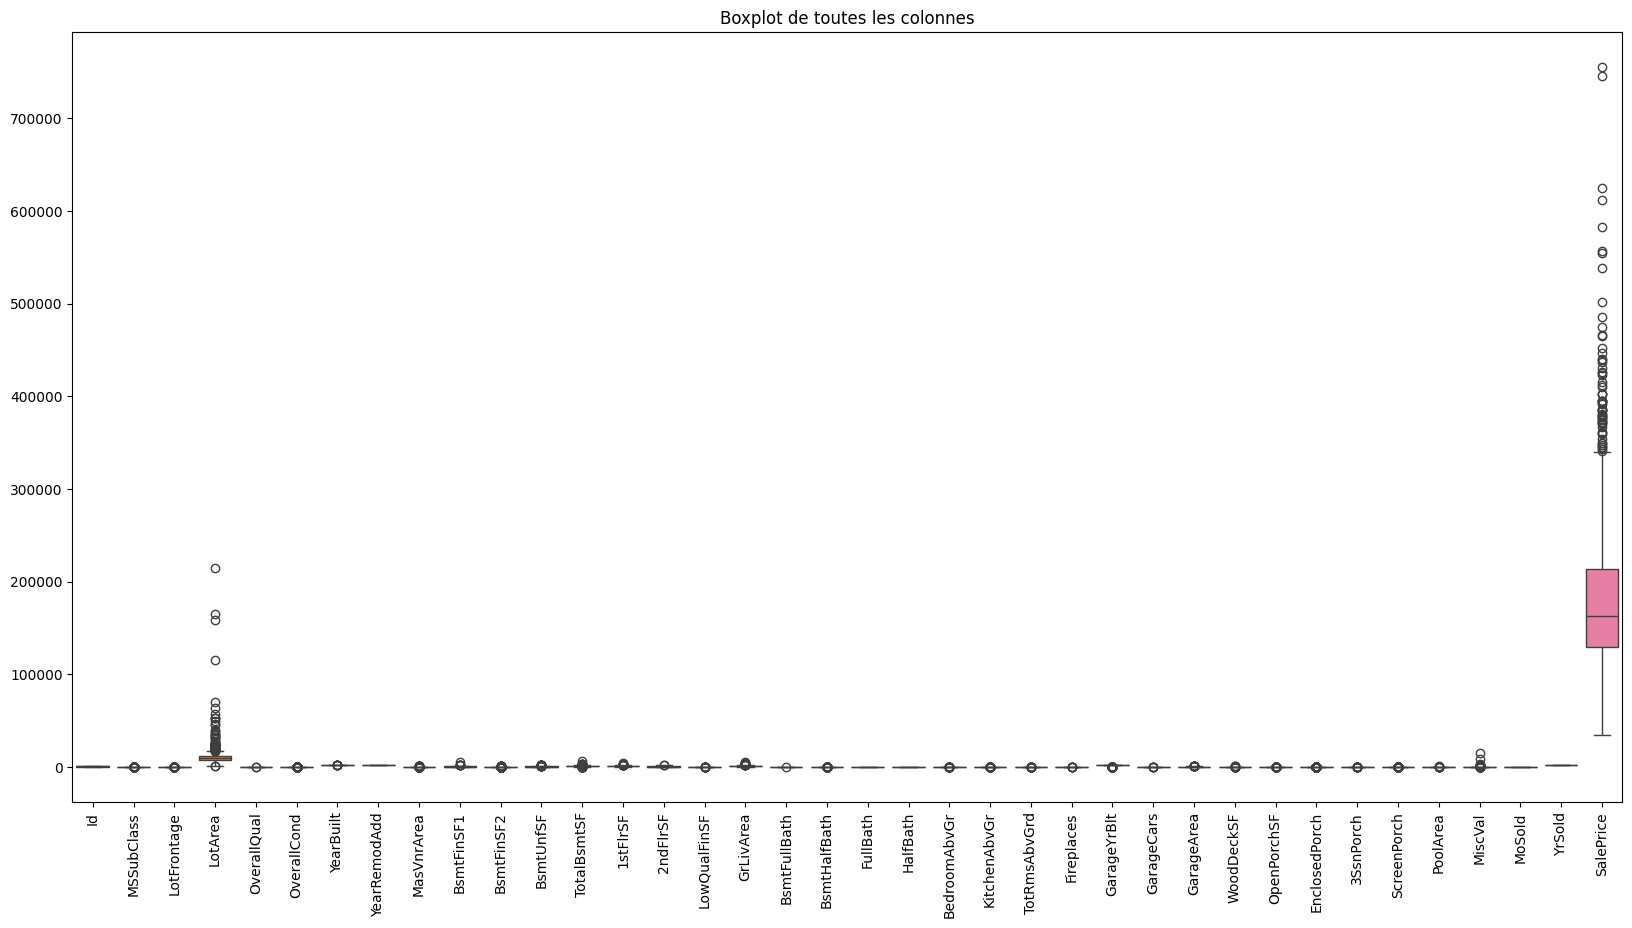

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))  # Ajuste la taille selon le nombre de colonnes
sns.boxplot(data=df_train)
plt.xticks(rotation=90)  # Rotation des noms de colonnes si nécessaire
plt.title("Boxplot de toutes les colonnes")
plt.show()


**Détection des valeurs aberrantes de la colonne LotArea**

In [ ]:
# Détection des valeurs abérrabtes dans la colonne 'LotArea'
df_train['LotArea'] = pd.to_numeric(df_train['LotArea'], errors='coerce')

Q1 =df_train['LotArea'].quantile(0.25)
Q3 = df_train['LotArea'].quantile(0.75)
IQR = Q3 - Q1
# Définition des bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers= (df_train['LotArea'] <lower_bound) | (df_train['LotArea'] > upper_bound)


**Comptage du nombre de valeurs aberrantes dans la colonne Amount et calcul de sa proportion par rapport à l'ensemble des valeurs.**

In [ ]:
# Compter le nombre d'outliers dans la colonne LotArea
nb_outliers = outliers.sum()

# proportion d'outliers
prop_outliers = nb_outliers / len(df_train)

print(f"Colonne {'LotArea'} : {nb_outliers} outliers sur {len(df_train)} lignes - soit {prop_outliers:.2%} du total")

Colonne LotArea : 69 outliers sur 1460 lignes - soit 4.73% du total


**Correction des valeurs aberrantes**

In [ ]:
median_value = df_train['LotArea'].median()

df_train['LotArea'] = df_train['LotArea'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

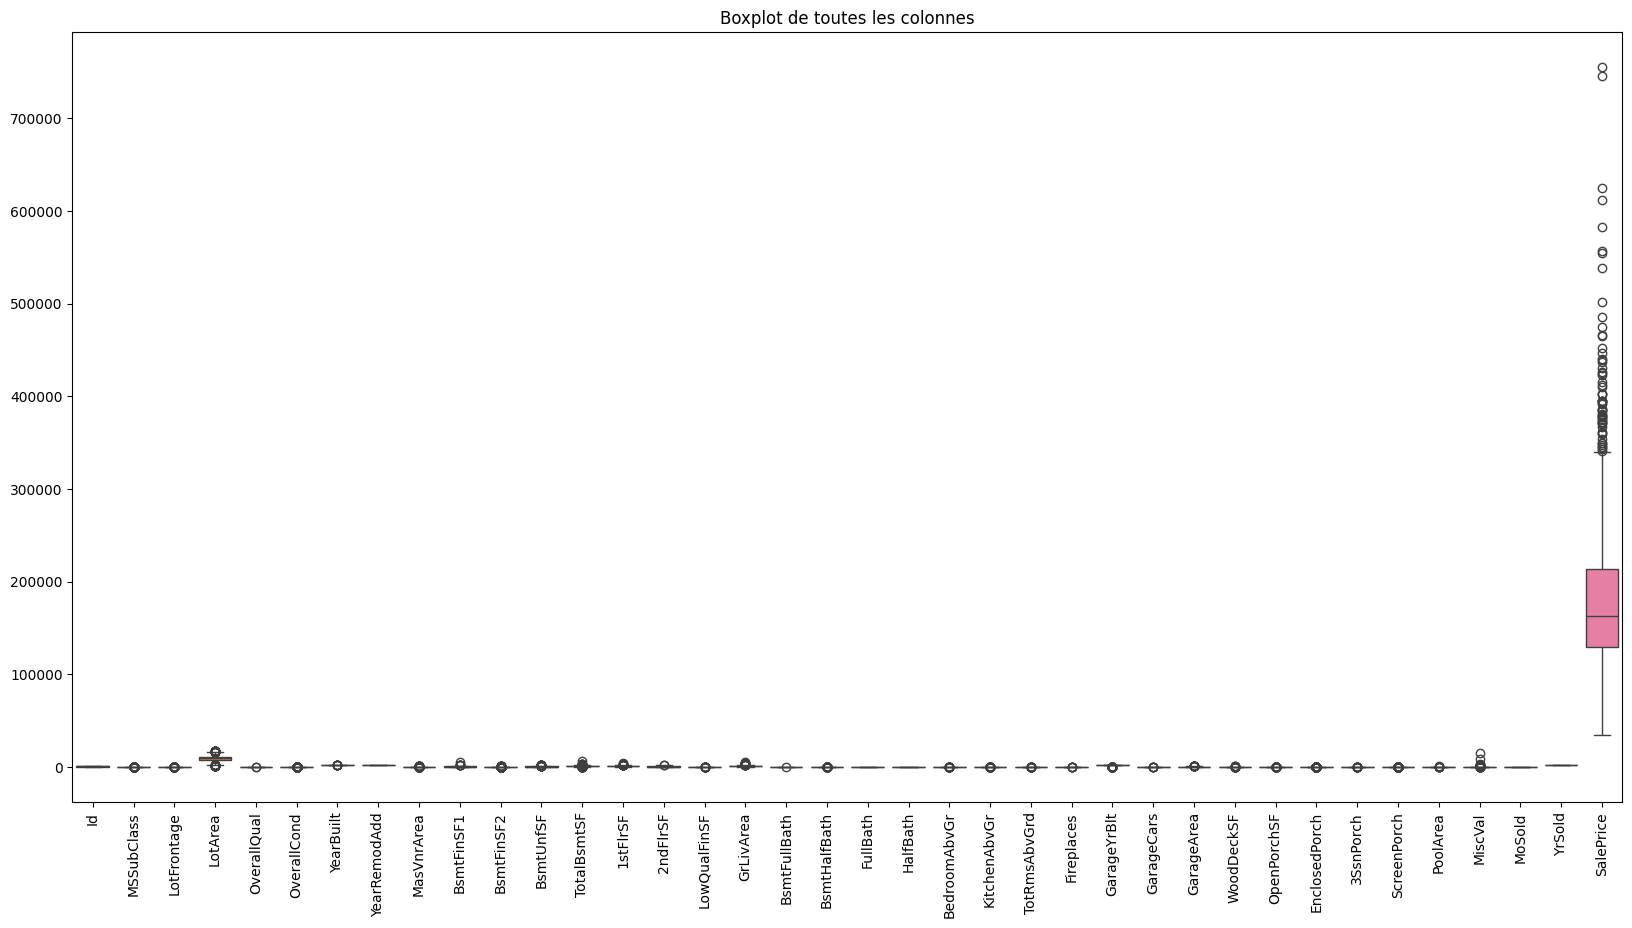

In [ ]:
plt.figure(figsize=(20, 10))  # Ajuste la taille selon le nombre de colonnes
sns.boxplot(data=df_train)
plt.xticks(rotation=90)  # Rotation des noms de colonnes si nécessaire
plt.title("Boxplot de toutes les colonnes")
plt.show()


**Matrice de correlation**

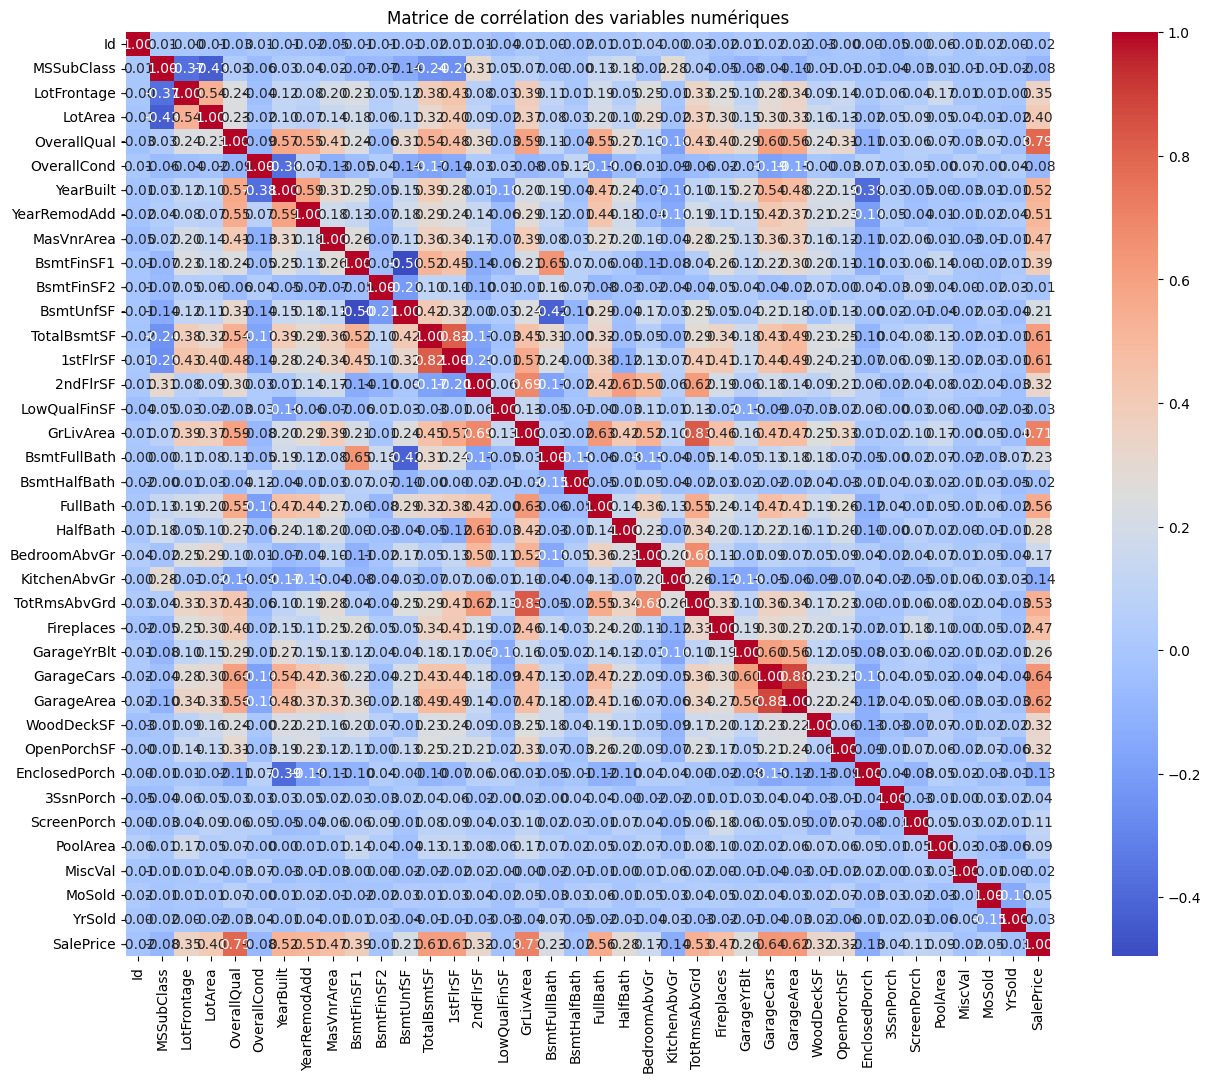

In [ ]:
# Sélection des variables numériques
numeric_df = df_train.select_dtypes(include=["int64", "float64"])

# Calcul de la matrice de corrélation
corr_matrix = numeric_df.corr()

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


**Extraire uniquement les variables numériques les plus corrélées avec SalePrice**

In [ ]:
# Sélection des colonnes numériques
numeric_df = df_train.select_dtypes(include=["int64", "float64"])
# Corrélation avec la variable cible
correlations = numeric_df.corr()["SalePrice"].sort_values(ascending=False)
# Garder les 10 ou 15 variables les plus corrélées (hors SalePrice lui-même)
top_features = correlations.drop("SalePrice").head(15).index
# Sous-matrice avec les variables les plus corrélées
top_corr_matrix = numeric_df[top_features].corr()


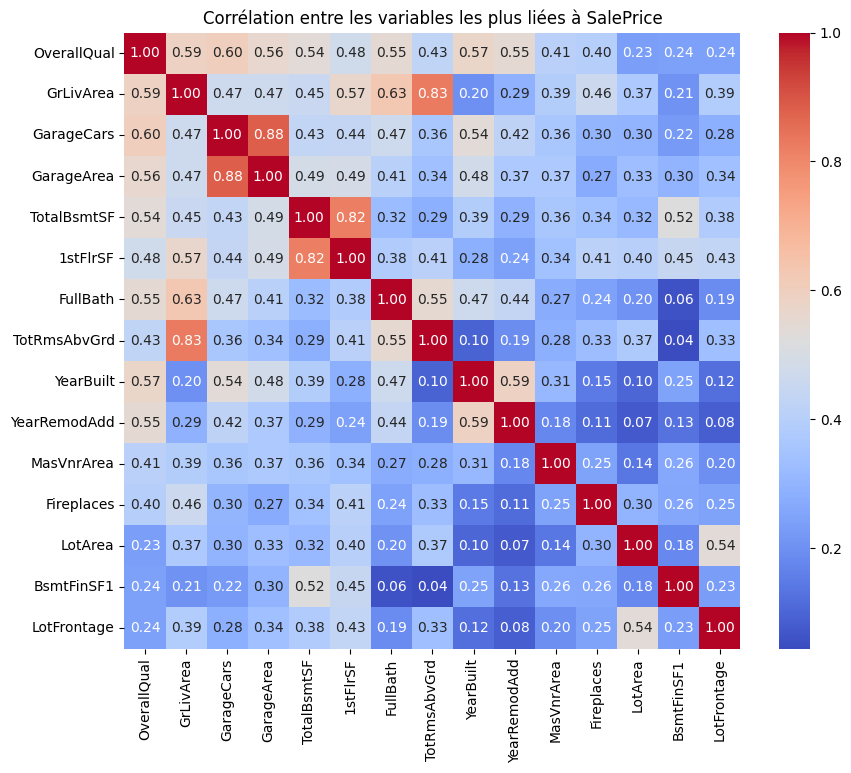

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Corrélation entre les variables les plus liées à SalePrice")
plt.show()


**Feature engineering**

*Âge de la maison*

In [ ]:
# Création de la variable Age
df_train['Age'] = 2025 - df_train['YearBuilt']


***Remodeled** — Indique si la maison a été rénovée*

In [ ]:
# Création d'une variable booléenne : True si rénovée, False sinon
df_train['Remodeled'] = df_train['YearBuilt'] != df_train['YearRemodAdd']


***TotalSF** — Surface totale utile*

In [ ]:
# Somme des surfaces du sous-sol, du rez-de-chaussée et du premier étage
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']


**Corrélation avec SalePrice (approximation)**

**TotalSF**: très forte corrélation (≈ +0.78)

**Age** : corrélation modérée mais significative (≈ –0.52)

**Remodeled** : corrélation indirecte, mais utile pour capturer des effets de rénovation

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,Remodeled,TotalSF
0,1,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,208500,22,False,2566
1,2,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,181500,49,False,2524
2,3,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,223500,24,True,2706
3,4,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,140000,110,True,2473
4,5,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,250000,25,False,3343


In [ ]:
df_train.shape

(1460, 84)

# **2. Pipeline de transformation**

**Le pipeline de transformation est une structure automatisée qui**:

* Applique les bonnes transformations aux bonnes colonnes

* Gère les étapes comme l’imputation, l’encodage, la normalisation

* S’intègre directement dans l’entraînement du modèle

* Permet de réutiliser les mêmes étapes sur les données de test ou en production

--> ***A ce niveau du projet, nous avons fait tout le travail préparatoire nécessaire pour construire un pipeline solide. Maintenant, nous devons formaliser ces étapes dans un pipeline `scikit-learn` pour automatiser et sécuriser ton workflow.***

In [ ]:
print(df_train[["Age", "Remodeled", "TotalSF"]].isnull().sum())


Age          0
Remodeled    0
TotalSF      0
dtype: int64


**Séparer les colonnes numériques et catégoriques**

In [ ]:
# Sélection des colonnes numériques (hors SalePrice)
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns.drop("SalePrice")

# Sélection des colonnes catégoriques
cat_cols = df_train.select_dtypes(include=["object", "bool"]).columns


In [ ]:
print(num_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Age', 'TotalSF'],
      dtype='object')


In [ ]:
print(cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Remodeled'],
      dtype='object')


In [ ]:
print("Age" in num_cols)        # Doit être True
print("TotalSF" in num_cols)        # Doit être True
print("Remodeled" in cat_cols)  # Si booléen, peut être traité comme catégorique


True
True
True


**Création du pipeline pour les variables numériques**


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Pipeline pour les colonnes numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


**✔️ Analyse :**

* **Imputation avec la médiane** : très bien pour les variables asymétriques ou avec outliers.

* **Standardisation avec StandardScaler** : utile pour les modèles sensibles à l’échelle (régression linéaire, SVM, etc.).

**Création du pipeline pour les variables catégorielles**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Pipeline pour les colonnes catégoriques
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])


**✔️ Analyse :**

* **Imputation** : remplace les valeurs manquantes par "`None`" (stratégie robuste pour les catégories absentes).

* **Encodage** : transforme les catégories en variables binaires avec `OneHotEncoder`, tout en ignorant les catégories inconnues au moment de la prédiction.

**Assembler les deux pipelines**:

création du `ColumnTransformer` pour appliquer :

`num_pipeline` aux colonnes numériques

`cat_pipeline` aux colonnes catégoriques

In [ ]:
from sklearn.compose import ColumnTransformer

# Assemblage des deux pipelines
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])


**Intégration du préprocesseur dans un pipeline de modélisation:**

Nous allons créer un pipeline complet qui inclut :

* Le prétraitement (preprocessor)

* Les deux modèles: RandomForestRegressor puis GradientBoostingRegressor

#***Création du pipeline Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])


*Séparer les features et la cible*

In [ ]:
# Séparation des variables explicatives et de la cible
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]


*Séparer en train/test*

In [ ]:
from sklearn.model_selection import train_test_split

# Split 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*Entraîner le pipeline complet*

In [ ]:
# Entraînement du pipeline avec Random Forest
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlr...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Remodeled'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

***Évaluer les performances***

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prédictions
y_pred = model_pipeline.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")



RMSE : 30506.37
R² : 0.88


**Interprétation**

🔹 1. RMSE : 30 506.37

Cela signifie que, en moyenne, notre modèle se trompe d’environ 30 500 $ sur le prix de vente des maisons.

Pour savoir si c’est “bon”, on le compare à la moyenne des prix (SalePrice.mean()), qui est autour de 180 000 $ dans ce dataset.

Donc ton erreur représente environ 17 % du prix moyen, ce qui est raisonnable pour un premier modèle sans tuning.

🔹 2. R² : 0.88

Cela signifie que notre modèle explique 88 % de la variance des prix de vente.

--> C’est un excellent score pour un modèle de base, surtout avec Random Forest sans optimisation.

# ***Création du pipeline Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# Pipeline Gradient Boosting
gb_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])


**Entraîner le modèle**

In [ ]:
gb_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlr...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Remodeled'],
      dtype='object'))])),
                ('model', GradientBoostingRegressor(random_state=42))])

**Évaluer les performances**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prédictions
y_pred_gb = gb_pipeline.predict(X_test)

# Métriques
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - RMSE : {rmse_gb:.2f}")
print(f"Gradient Boosting - R² : {r2_gb:.2f}")


Gradient Boosting - RMSE : 27559.77
Gradient Boosting - R² : 0.90


**Interprétation**

🔹 **1. Gradient Boosting est plus performant**
RMSE plus bas : une erreur moyenne de 27 560 $ contre 30 500 $ pour Random Forest → ≈ 3 000 $ de gain en précision

R² plus élevé : 90 % de la variance expliquée contre 88 % → le modèle est plus explicatif

🔹 2. Pourquoi Gradient Boosting est meilleur ici ?
Il construit les arbres de manière séquentielle, en corrigeant les erreurs précédentes.

Il est souvent plus précis sur des données tabulaires avec des relations non linéaires.

Il est aussi plus sensible au tuning, donc tu pourras encore améliorer ses performances avec `GridSearchCV`.

# ***Feature Importance***




**Extrairaction des variables les plus influentes du modèle Gradient Boosting**

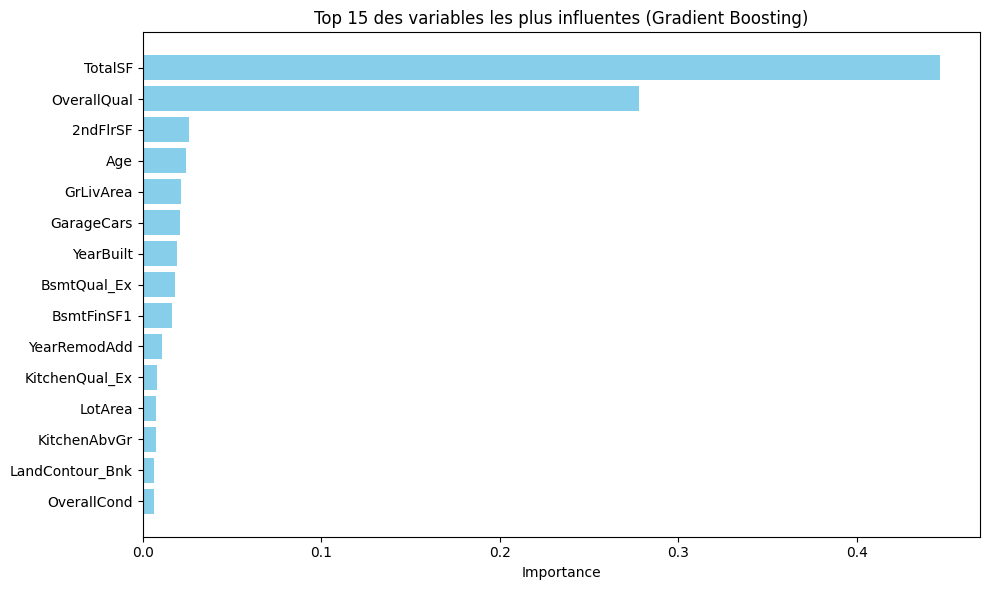

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Récupérer les noms des colonnes numériques
num_features = gb_pipeline.named_steps["preprocessing"].transformers_[0][2]

# Récupérer les noms des colonnes catégoriques encodées
cat_features = gb_pipeline.named_steps["preprocessing"].transformers_[1][1] \
    .named_steps["encoder"].get_feature_names_out(cat_cols)

# Fusionner les deux listes proprement
feature_names = list(num_features) + list(cat_features)


# Récupérer les importances
importances = gb_pipeline.named_steps["model"].feature_importances_

# Créer un DataFrame
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][::-1], feat_imp_df["Importance"][::-1], color="skyblue")
plt.xlabel("Importance")
plt.title("Top 15 des variables les plus influentes (Gradient Boosting)")
plt.tight_layout()
plt.show()


# **3. Génération des prédictions sur le jeu de test**

--> **Etape cruciale permettant de produire les résultats finaux que nous allons les soumettre pour évaluation externe, notamment sur Kaggle.**

*Importation du fichier test.csv*

In [ ]:
#Accés au dataset test de house-prices-advanced-regression-techniques
df_test=pd.read_csv('/content/drive/MyDrive/Test Full Pack IA/projet3_prediction/test.csv')


In [ ]:

# Calcul du nombre de valeurs nulles par colonne
missing_values = df_test.isnull().sum()

# Affichage des colonnes avec au moins une valeur manquante
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes :")
print(missing_values)


Colonnes avec valeurs manquantes :
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64


# ***Traitement des valeurs nulles pour chaque colonne du dataset Test par imputation***

In [ ]:
# Remplir par "None" pour absence d'élément
none_fill = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
             "GarageType", "GarageFinish", "GarageQual", "GarageCond",
             "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]

for col in none_fill:
    df_test[col] = df_test[col].fillna("None")

# Remplir les colonnes numériques par 0
zero_fill = ["GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2",
             "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea", "BsmtFullBath", "BsmtHalfBath"]

for col in zero_fill:
    df_test[col] = df_test[col].fillna(0)

# Remplir par la valeur la plus fréquente
mode_fill = ["MSZoning", "KitchenQual", "SaleType", "Functional", "Utilities",
             "Exterior1st", "Exterior2nd"]

for col in mode_fill:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

# Imputation intelligente de LotFrontage par médiane de quartier
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)


In [ ]:
# Calcul du nombre de valeurs nulles par colonne
missing_values = df_test.isnull().sum()

# Affichage des colonnes avec au moins une valeur manquante
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes :")
print(missing_values)

Colonnes avec valeurs manquantes :
Series([], dtype: int64)


**Recherche des valeurs aberrantes dans df_test**

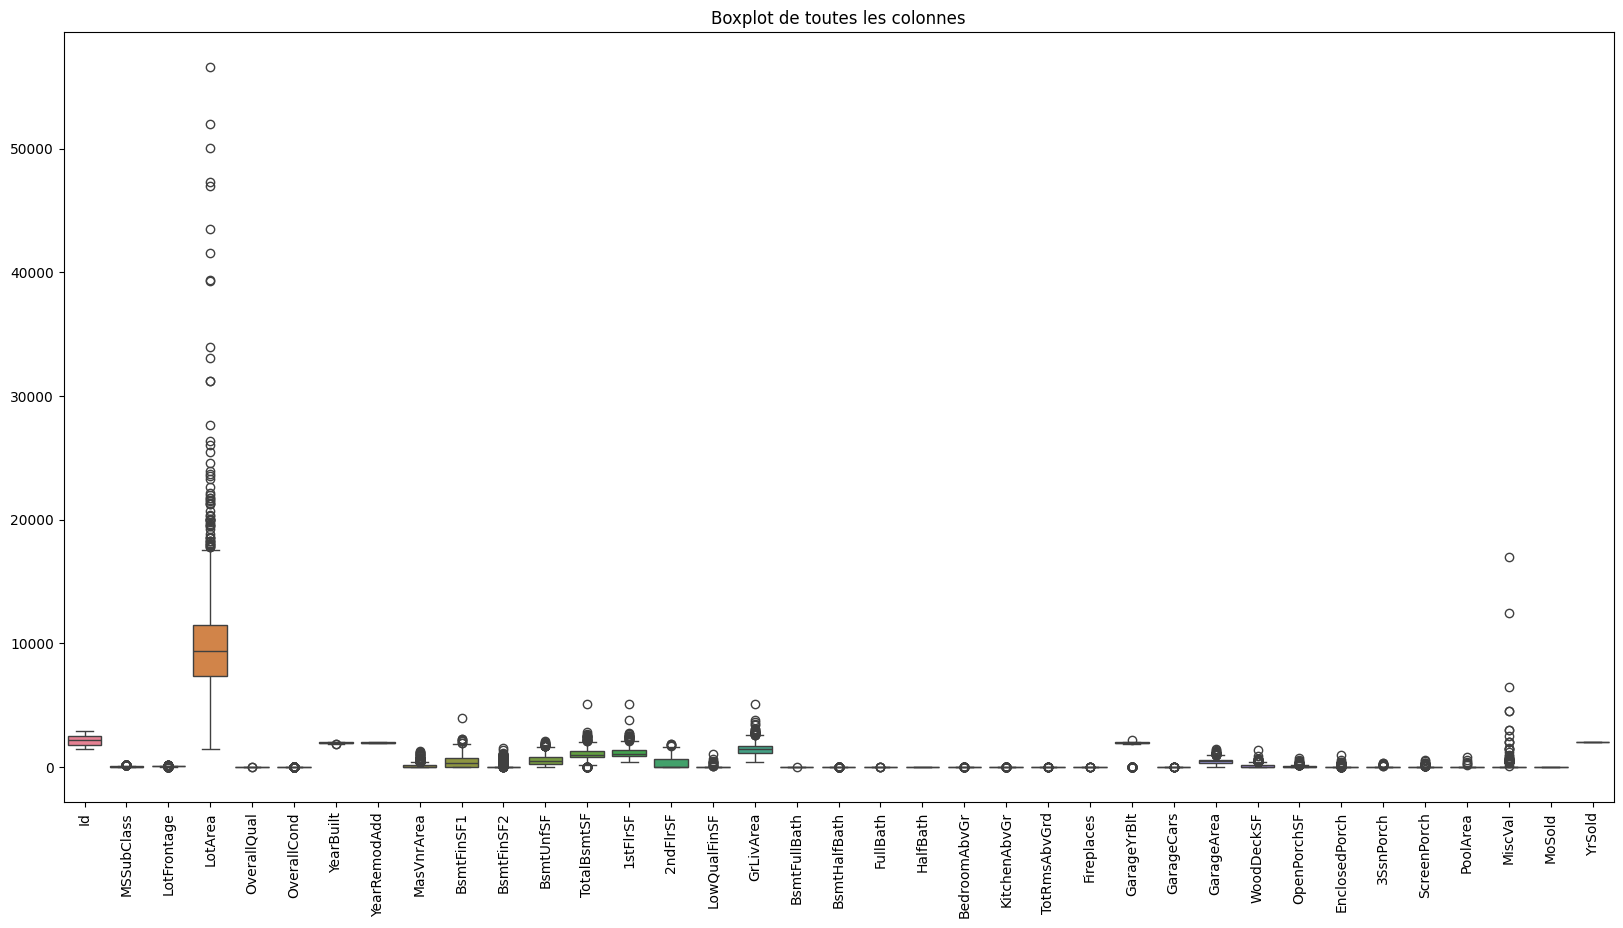

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))  # Ajuste la taille selon le nombre de colonnes
sns.boxplot(data=df_test)
plt.xticks(rotation=90)  # Rotation des noms de colonnes si nécessaire
plt.title("Boxplot de toutes les colonnes")
plt.show()

**Comptage de nombre des valeurs aberrantes des colonnes numériques de df_test**

In [ ]:
import pandas as pd

# Sélection des colonnes numériques
num_cols = df_test.select_dtypes(include=["int64", "float64"]).columns

# Dictionnaire pour stocker les résultats
outlier_counts = {}

for col in num_cols:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Afficher les colonnes avec au moins 1 valeur aberrante
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["Outlier Count"])
outlier_df = outlier_df[outlier_df["Outlier Count"] > 0].sort_values(by="Outlier Count", ascending=False)
print(outlier_df)


               Outlier Count
EnclosedPorch            251
BsmtFinSF2               180
ScreenPorch              140
OverallCond              127
LotFrontage              113
MasVnrArea               104
MSSubClass               104
BsmtHalfBath              93
GarageYrBlt               79
OpenPorchSF               79
KitchenAbvGr              66
TotalBsmtSF               62
LotArea                   60
MiscVal                   51
GrLivArea                 44
BedroomAbvGr              43
WoodDeckSF                35
BsmtUnfSF                 26
1stFlrSF                  23
GarageArea                21
TotRmsAbvGrd              21
LowQualFinSF              14
3SsnPorch                 13
GarageCars                12
BsmtFinSF1                 8
Fireplaces                 7
PoolArea                   6
2ndFlrSF                   5
FullBath                   4
OverallQual                2
YearBuilt                  2
BsmtFullBath               1


**Feature engeneering**

In [ ]:
# Exemple : si tu as créé ces colonnes dans df_train
df_test["TotalSF"] = df_test["TotalBsmtSF"] + df_test["1stFlrSF"] + df_test["2ndFlrSF"]
df_test["Age"] = df_test["YrSold"] - df_test["YearBuilt"]
df_test["Remodeled"] = (df_test["YearBuilt"] != df_test["YearRemodAdd"]).astype(int)



In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Age,Remodeled
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,MnPrv,None,0,6,2010,WD,Normal,1778.0,49,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,None,Gar2,12500,6,2010,WD,Normal,2658.0,52,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,MnPrv,None,0,3,2010,WD,Normal,2557.0,13,1
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,None,None,0,6,2010,WD,Normal,2530.0,12,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,None,None,0,1,2010,WD,Normal,2560.0,18,0


In [ ]:
df_test.shape

(1459, 83)

**Comparer les colonnes entre df_train et df_test**

In [ ]:
# Colonnes présentes dans df_train mais absentes dans df_test
missing_in_test = set(df_train.columns) - set(df_test.columns)

# Colonnes présentes dans df_test mais absentes dans df_train
extra_in_test = set(df_test.columns) - set(df_train.columns)

print("Colonnes manquantes dans df_test :", missing_in_test)
print("Colonnes en trop dans df_test :", extra_in_test)


Colonnes manquantes dans df_test : {'SalePrice'}
Colonnes en trop dans df_test : set()


# **Génération des prédictions en utilisant le modèle Gradient Boosting**

In [ ]:
# Générer les prédictions
predictions = gb_pipeline.predict(df_test)

# Créer le fichier de soumission
submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": predictions
})

# Sauvegarder le fichier
submission.to_csv("/content/drive/MyDrive/Test Full Pack IA/projet3_prediction/submission.csv", index=False)


**Lien de la soumission sous kuggle**

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/submissions

Public score = 0.13752


# **Fin de Test technlique Full Pack IA**

---